In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest modeli oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

# Detaylı rapor (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

# Karmaşıklık matrisi oluşturma ve görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# ROC-AUC Hesaplama ve Grafik (İkili sınıflandırma kontrolü)
if len(set(y_test)) == 2:  # Yalnızca ikili sınıflandırma için geçerli
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılık tahmini
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest - ROC Curve")
    plt.legend()
    plt.show()


NameError: name 'X_train' is not defined

Eğitim verisi boyutu: (10178, 300)
Test verisi boyutu: (2545, 300)
Random Forest Model Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.90      0.89      1301
     Class 1       0.90      0.86      0.88      1244

    accuracy                           0.88      2545
   macro avg       0.89      0.88      0.88      2545
weighted avg       0.88      0.88      0.88      2545



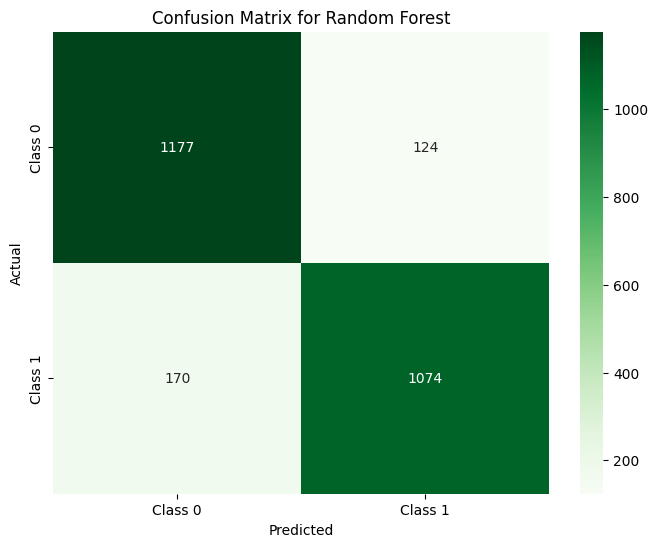

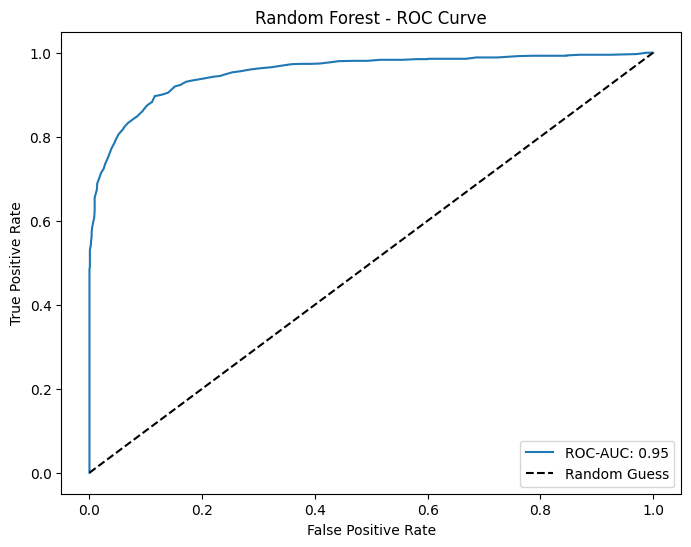

In [2]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# PKL dosyasını yükleme
with open("fasttext_vectors.pkl", "rb") as file:
    X, y = pickle.load(file)

# NumPy dizisine dönüştürme
X = np.array(X)
y = np.array(y)

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test veri setlerini kontrol etme
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

# Random Forest modeli oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

# Modelin doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")

# Detaylı rapor (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

# Karmaşıklık matrisi oluşturma ve görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

# ROC-AUC Hesaplama ve Grafik (İkili sınıflandırma kontrolü)
if len(set(y_test)) == 2:  # Yalnızca ikili sınıflandırma için geçerli
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılık tahmini
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest - ROC Curve")
    plt.legend()
    plt.show()
